In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

import statsmodels.api as sm


from sklearn.neighbors import KNeighborsRegressor


from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# from sklearn import metrics
# Classification model metrics modules
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix


#Pipeline and grid search modules

from sklearn.model_selection import GridSearchCV


print('finished imports')

finished imports


In [2]:
# cd C:\Users\pozzo\Desktop\SAC\Data Science\GA DS Immersive\Projects\project_4_hackathon\data

In [3]:
#initial look at data

eatz_0 = pd.read_csv("../data/train.csv")

print(eatz_0.shape)
eatz_0.head(3)

(137, 43)


,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0


In [4]:
eatz_0.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

In [5]:
# check columns for compromised data; it's all good

eatz_0.isnull().sum();

## EDA Phase 1
## Inspect and engineer columns 

In [6]:
eatz_0.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
Id            137 non-null int64
Open Date     137 non-null object
City          137 non-null object
City Group    137 non-null object
Type          137 non-null object
P1            137 non-null int64
P2            137 non-null float64
P3            137 non-null float64
P4            137 non-null float64
P5            137 non-null int64
P6            137 non-null int64
P7            137 non-null int64
P8            137 non-null int64
P9            137 non-null int64
P10           137 non-null int64
P11           137 non-null int64
P12           137 non-null int64
P13           137 non-null float64
P14           137 non-null int64
P15           137 non-null int64
P16           137 non-null int64
P17           137 non-null int64
P18           137 non-null int64
P19           137 non-null int64
P20           137 non-null int64
P21           137 non-null int64
P22           137 non-nul

In [7]:
# inspect variable Open Date towards determing age of restaurants

gb_Open_date=eatz_0.groupby(['Open Date']).count()
gb_Open_date.shape
# type(eatz_0['Open Date'][0])


(134, 42)

In [8]:
# convert 'Open Date' to date format
# https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/

eatz_0['Open Date']= pd.to_datetime(eatz_0['Open Date'])

In [9]:
# add an age column and inspect ditribution of ages  zzzzzzzzzz

eatz_0['open_year'] = eatz_0['Open Date'].dt.year
eatz_0['age'] = 2020 - eatz_0['open_year']
eatz_0['age'].describe()

count    137.000000
mean      11.321168
std        4.027359
min        6.000000
25%        9.000000
50%       10.000000
75%       13.000000
max       24.000000
Name: age, dtype: float64

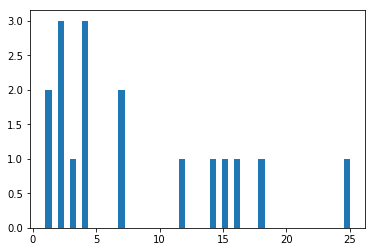

In [10]:
gb_age=eatz_0.groupby(['age']).count()
gb_age=eatz_0.groupby(['age']).count()

age_buff = gb_age['Id']
age_buff
plt.hist(age_buff, bins=50);
# gb_age
# gb_age.shape

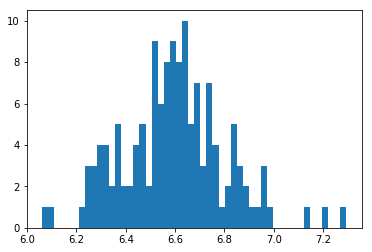

In [11]:
eatz_0['rev_2'] =np.log10(eatz_0['revenue'])
eatz_0['rev_2'].describe()
plt.hist(eatz_0['rev_2'], bins=50);


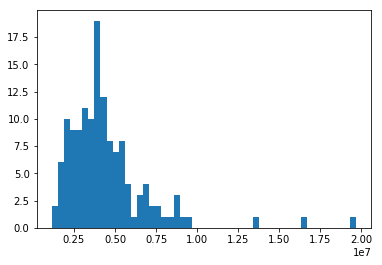

In [12]:
plt.hist(eatz_0['revenue'], bins=50);

In [13]:
# inspect categorical variable City Group; how many categories are there?
# There are two - Big Cities and Other
# Dummify

gb_City_Group=eatz_0.groupby(['City Group']).count()
gb_City_Group.shape

(2, 45)

In [14]:
# Dummify "City Group"

eatz_1 = pd.get_dummies(columns=["City Group"], drop_first=True, data=eatz_0)

In [15]:
# inspect categorical variable Type; how many categories are there?
# There are three - FC: Food Curt; IL: Inline (strip mall); DT: Drive-thru
# Dummify

gb_Type=eatz_0.groupby(['Type']).count()
gb_Type=eatz_0.groupby(['Type']).count()
gb_Type.shape

(3, 45)

In [16]:
# Dummify "Type"

eatz_1 = pd.get_dummies(columns=["Type"], drop_first=True, data=eatz_1)

In [17]:
eatz_1.columns

Index(['Id', 'Open Date', 'City', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7',
       'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17',
       'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27',
       'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37',
       'revenue', 'open_year', 'age', 'rev_2', 'City Group_Other', 'Type_FC',
       'Type_IL'],
      dtype='object')

In [18]:
col_name="revenue"
rev_col=eatz_1.pop(col_name)
eatz_1.insert(0, col_name, rev_col)
eatz_1.head(4)


,revenue,Id,Open Date,City,P1,P2,P3,P4,P5,P6,...,P34,P35,P36,P37,open_year,age,rev_2,City Group_Other,Type_FC,Type_IL
0,5653753.0,0,1999-07-17,İstanbul,4,5.0,4.0,4.0,2,2,...,5,4,3,4,1999,21,6.752337,0,0,1
1,6923131.0,1,2008-02-14,Ankara,4,5.0,4.0,4.0,1,2,...,0,0,0,0,2008,12,6.840303,0,1,0
2,2055379.0,2,2013-03-09,Diyarbakır,2,4.0,2.0,5.0,2,3,...,0,0,0,0,2013,7,6.312892,1,0,1
3,2675511.0,3,2012-02-02,Tokat,6,4.5,6.0,6.0,4,4,...,18,12,12,6,2012,8,6.427407,1,0,1


## EDA

## Null model

In [19]:
eatz_1['revenue'].mean()

4453532.613138686

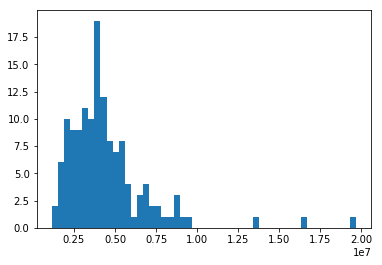

In [20]:
# eatz_1['revenue']

plt.hist(eatz_1['revenue'], bins=50);

In [21]:
eatz_1 = eatz_1.drop(eatz_1[eatz_1['revenue'] > 10000000].index)
eatz_1.shape

(134, 47)

In [22]:
# inspect data's descriptive statistics
eatz_1.describe()
eatz_1.columns

Index(['revenue', 'Id', 'Open Date', 'City', 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37', 'open_year', 'age', 'rev_2', 'City Group_Other', 'Type_FC',
       'Type_IL'],
      dtype='object')

In [23]:
cols_list=eatz_1.columns
cols_list

Index(['revenue', 'Id', 'Open Date', 'City', 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37', 'open_year', 'age', 'rev_2', 'City Group_Other', 'Type_FC',
       'Type_IL'],
      dtype='object')

In [24]:
features = ['revenue', 'rev_2', 'Id', 'Open Date', 'City', 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37', 'open_year', 'age', 'City Group_Other', 'Type_FC', 'Type_IL']

In [25]:
eatz_X=eatz_1[features]
Corrs=eatz_X.corr()
# Corrs['0']

# https://stackoverflow.com/questions/15360925/how-to-get-the-first-column-of-a-pandas-dataframe-as-a-series

# Corrs.columns
# Corrs.iloc[:,0].sort_values(by=['revenue'])

Corrs.sort_values(by=['revenue'], ascending=False)
# Corrs['revenue']

,revenue,rev_2,Id,P1,P2,P3,P4,P5,P6,P7,...,P33,P34,P35,P36,P37,open_year,age,City Group_Other,Type_FC,Type_IL
revenue,1.000000,0.963103,0.035886,0.106975,0.217491,0.011755,0.057928,0.002373,0.125315,0.102491,...,0.010659,-0.068246,-0.038330,-0.038126,0.003478,-0.202740,0.202740,-0.211989,0.086291,-0.083323
rev_2,0.963103,1.000000,0.036653,0.127019,0.215257,0.043077,0.084395,0.030545,0.156076,0.130189,...,0.059618,-0.030041,0.002072,0.002028,0.063449,-0.242897,0.242897,-0.181963,0.038858,-0.038850
P2,0.217491,0.215257,-0.036334,0.838885,1.000000,0.477588,0.542889,0.206367,0.672183,0.773089,...,0.238867,0.397430,0.317964,0.391217,0.163148,-0.161109,0.161109,-0.417732,-0.130702,0.144693
age,0.202740,0.242897,0.130339,0.091001,0.161109,0.028092,-0.011922,-0.115942,0.175689,0.001588,...,0.135228,0.091608,0.051479,0.106275,0.174345,-1.000000,1.000000,-0.148095,-0.091217,0.076489
P28,0.190908,0.218903,0.028128,0.845818,0.734997,0.649976,0.644160,0.330666,0.734705,0.745602,...,0.265814,0.450661,0.340990,0.455599,0.212866,-0.122720,0.122720,-0.296379,-0.095277,0.103271
P6,0.125315,0.156076,-0.020874,0.751361,0.672183,0.575940,0.600422,0.330282,1.000000,0.742725,...,0.307028,0.525265,0.419852,0.530788,0.333469,-0.175689,0.175689,-0.412403,-0.159960,0.148561
P23,0.114357,0.160208,-0.001658,0.702550,0.518695,0.602103,0.558196,0.356427,0.492507,0.652238,...,0.318103,0.473079,0.404140,0.452355,0.220578,-0.044638,0.044638,-0.012654,-0.215070,0.220207
P1,0.106975,0.127019,-0.030411,1.000000,0.838885,0.697242,0.677659,0.305929,0.751361,0.854802,...,0.331468,0.572795,0.451969,0.557497,0.279780,-0.091001,0.091001,-0.261099,-0.174715,0.190482
P7,0.102491,0.130189,-0.082213,0.854802,0.773089,0.651155,0.702271,0.446302,0.742725,1.000000,...,0.339605,0.563571,0.459909,0.545259,0.311692,-0.001588,0.001588,-0.198472,-0.162402,0.191487
Type_FC,0.086291,0.038858,0.205303,-0.174715,-0.130702,-0.130333,-0.082443,-0.075372,-0.159960,-0.162402,...,-0.696227,-0.516301,-0.635282,-0.568822,-0.626889,0.091217,-0.091217,0.133559,1.000000,-0.984999


### Correlations analysis

1. Strongest correlation to 'revenue' is age.  Since this is a feature that a new restaurant can't posses, by definition. this feauture should be ignored in prospective models.

2. Drop 'Id'


In [26]:
# plt.figure(figsize=(12,12))
# sns.heatmap(eatz_1.corr(), annot=True)
# sns.pairplot(eatz_1)

In [27]:
eatz_1.columns

Index(['revenue', 'Id', 'Open Date', 'City', 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37', 'open_year', 'age', 'rev_2', 'City Group_Other', 'Type_FC',
       'Type_IL'],
      dtype='object')

In [28]:
features =['City Group_Other', 'Type_FC', 'Type_IL', 'P1', 'P2', 'P3', 'P4', 'P5',
           'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
           'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26','P27',
           'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36','P37'
          ]


# features =[
#             'P1', 'P2', 'P6', 'P7', 'P23', 'P28', 'City Group_Other'
#           ]

# qqqqqq

X = eatz_1[features]
y = eatz_1['revenue']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [30]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
lr.score(X_train, y_train)

0.4069392688123312

In [32]:
cross_val_score(lr, X_train, y_train, cv=5)

array([-0.71858569, -9.98422011, -0.76228764, -2.86772977, -1.5562209 ])

In [33]:
lr.coef_

array([-462674.36489396,  848976.14785534,  486452.56293179,
       -114561.97808262,  351364.43802393, -219666.59955832,
        -26634.46776018,  -85240.49720537,  -44129.60600374,
        -18362.75890633, -768743.95416669, -279548.39848468,
       -459522.24886238,  -59786.83228766,  856888.72089814,
        319141.83728331,  -73325.03232126, -254427.62633761,
       -504308.85766818,  376783.47943415,  776003.02475913,
        133886.75837869, -372464.26846014, -117288.57461638,
       -198184.27421462,  -24108.26016307,   61578.19587547,
        558331.79998691, -909736.80888519,   36520.97893267,
        859608.52053948,  465218.84302991,  244169.39428649,
        459034.00026566, -569974.82656052,  140824.87406936,
       -186117.86211381, -111169.52619505,  492205.95929037,
       -160024.40495374])

In [34]:
X=sm.add_constant(X)
Model_sm=sm.OLS(y, X).fit()
    
    # coefficients from Statsmodel OLS model
# print(Model_sm.params)
Model_sm.params


C:\Users\pozzo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const               4.572968e+06
City Group_Other   -4.790986e+05
Type_FC             1.736451e+06
Type_IL             1.076022e+06
P1                 -1.967467e+05
P2                  4.652383e+05
P3                 -2.258403e+05
P4                 -1.898134e+05
P5                  9.485428e+04
P6                  6.674492e+03
P7                  1.463804e+04
P8                 -6.805885e+05
P9                  1.424319e+04
P10                 4.445725e+05
P11                -2.616291e+05
P12                 1.211339e+05
P13                -4.817298e+05
P14                -1.292196e+05
P15                -1.029514e+05
P16                -2.945679e+05
P17                 3.557955e+05
P18                 1.643481e+05
P19                 1.280632e+04
P20                -2.382058e+05
P21                -5.793760e+04
P22                -2.474843e+05
P23                 1.486664e+05
P24                 1.211513e+05
P25                 5.056914e+05
P26                -6.770191e+05
P27       

In [35]:
# Model_sm.mse_resid*Model_sm.nobs
# Model_sm.mse_resid
# # MSE**.5
# Model_sm.rsquared
# Model_sm.rsquared_adj   
# Model_sm.fvalue
# Model_sm.f_pvalue 
Model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     1.306
Date:                Mon, 02 Nov 2020   Prob (F-statistic):              0.148
Time:                        15:47:24   Log-Likelihood:                -2089.8
No. Observations:                 134   AIC:                             4262.
Df Residuals:                      93   BIC:                             4380.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.573e+06   3.57e+06      1.281      0.203   -2.52e+06    1.17e+07
City Group_Other -4.791e+05   4.43e+05     -1.081      0.283   -1.36e+06    4.01e+05
Type_FC           1.736e+06   2.58e+06      0.673      0.503   -3.39e+06    6.86e+06
Type_IL           1.076e+06   2.58e+06      0.416      0.678   -4.06e+06    6.21e+06
P1               -1.967e+05   2.49e+05     -0.791      0.431   -6.91e+05    2.97e+05
P2                4.652e+05    2.7e+05      1.721      0.089   -7.17e+04       1e+06
P3               -2.258e+05   3.42e+05     -0.661      0.510   -9.04e+05    4.53e+05
P4               -1.898e+05   3.84e+05     -0.494      0.622   -9.53e+05    5.73e+05
P5                9.485e+04   2.75e+05      0.345      0.731   -4.51e+05    6.41e+05
P6                6674.4919   1.87e+05      0.036      0.972   -3.65e+05    3.78e+05
P7                1.464e+04   1.97e+05      0.074      0.941   -3.77e+05    4.06e+05
P8               -6.806e+05   3.83e+05     -1.778      0.079   -1.44e+06    7.95e+04
P9                1.424e+04   7.55e+05      0.019      0.985   -1.48e+06    1.51e+06
P10               4.446e+05   1.16e+06      0.384      0.702   -1.85e+06    2.74e+06
P11              -2.616e+05   2.14e+05     -1.224      0.224   -6.86e+05    1.63e+05
P12               1.211e+05   4.83e+05      0.251      0.802   -8.38e+05    1.08e+06
P13              -4.817e+05   1.08e+06     -0.446      0.657   -2.63e+06    1.67e+06
P14              -1.292e+05   2.46e+05     -0.526      0.600   -6.17e+05    3.59e+05
P15               -1.03e+05   3.41e+05     -0.302      0.764   -7.81e+05    5.75e+05
P16              -2.946e+05   3.87e+05     -0.761      0.449   -1.06e+06    4.74e+05
P17               3.558e+05   2.54e+05      1.398      0.165    -1.5e+05    8.61e+05
P18               1.643e+05    2.9e+05      0.567      0.572   -4.11e+05     7.4e+05
P19               1.281e+04   1.01e+05      0.127      0.899   -1.87e+05    2.13e+05
P20              -2.382e+05   1.27e+05     -1.871      0.064   -4.91e+05    1.46e+04
P21              -5.794e+04   1.83e+05     -0.317      0.752   -4.21e+05    3.05e+05
P22              -2.475e+05   1.91e+05     -1.294      0.199   -6.27e+05    1.32e+05
P23               1.487e+05   9.29e+04      1.600      0.113   -3.58e+04    3.33e+05
P24               1.212e+05   3.96e+05      0.306      0.761   -6.66e+05    9.08e+05
P25               5.057e+05   3.84e+05      1.316      0.191   -2.58e+05    1.27e+06
P26               -6.77e+05   4.29e+05     -1.577      0.118   -1.53e+06    1.76e+05
P27               1.542e+05   1.61e+05      0.955      0.342   -1.66e+05    4.75e+05
P28               6.366e+05   2.26e+05      2.818      0.006    1.88e+05    1.09e+06
P29               3.855e+05   2.41e+05      1.601      0.113   -9.25e+04    8.63e+05
P30               1526.

In [36]:
# Scale our data.
# Relabeling scaled data as "Z" is common.
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

C:\Users\pozzo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\pozzo\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\pozzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [37]:
ols = LinearRegression()
ols.fit(Z_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
print(ols.score(Z_train, y_train))
print(ols.score(Z_test, y_test))

0.4069392688123311
-0.8815439908682863


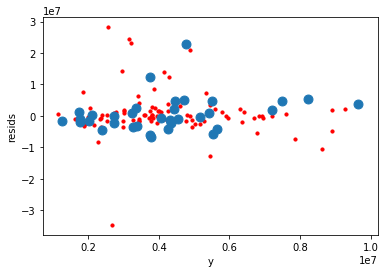

In [52]:
# Make predictions
y_pred_train = ols.predict(X_train)
y_pred_test = ols.predict(X_test)
# Create residuals (aka errors): (y - y_hat)
resids_train = y_train - y_pred_train
resids_test = y_test - y_pred_test
# plt.scatter(y_train, y_pred_train, s=10);
# plt.scatter(y_test, y_pred_test, s=20);

plt.scatter(y_train, resids_train, s=10, c='r');
plt.scatter(y_test, resids_test, s=80);
plt.xlabel('y')
plt.ylabel('resids');

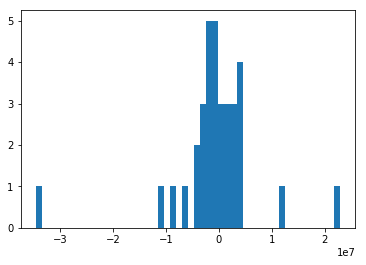

In [40]:
plt.hist(resids_test, bins=50);

In [41]:
# Ridge regressor lives here:# Instantiate.
ridge_model = Ridge(alpha=10)

# Fit.
ridge_model.fit(Z_train, y_train)

# Set up a list of ridge alphas to check.
# np.logspace generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.
r_alphas = np.logspace(0, 5, 100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

# Fit model using best ridge alpha!
ridge_cv = ridge_model.fit(Z_train, y_train)

# Here is the optimal value of alpha
ridge_cv.alpha


10

In [42]:
print(ridge_cv.score(Z_train, y_train))
print(ridge_cv.score(Z_test, y_test))

0.2577075945643015
0.19315325144206918


## KNN regressor model

In [43]:
# features =['City Group_Other', 'Type_FC', 'Type_IL', 'P1', 'P2', 'P3', 'P4', 'P5',
#            'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
#            'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26','P27',
#            'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36','P37'
#           ]


# features =['City Group_Other', 'Type_FC', 'Type_IL', 'P2', 'P6', 'P8', 'P13', 'P28', 'P29'
#           ]

X = eatz_1[features]
y = eatz_1['revenue']

In [44]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [45]:
ss = StandardScaler()           # normalizes data to Z-score, stds from mean
ss.fit(X_train)                 # ONLY FIT TO X_TRAIN, NEVER TO TEST!!!!

# X_train_sc
X_train_sc = ss.transform(X_train)      # transform data to Z-score basis

# X_test_sc
X_test_sc = ss.transform(X_test)

C:\Users\pozzo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\pozzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\pozzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [46]:
knn_gridsearch = GridSearchCV(estimator=KNeighborsRegressor(),
                              param_grid = {'n_neighbors': range(2, 4, 8),
                                              'metric': ['euclidean', 'manhattan']
                                              },
                              cv=5, # What number of folds in CV will we use?
                              verbose=1)

# Fit the GridSearchCV object to the data.
knn_gridsearch.fit(X_train_sc, y_train);

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


rmse_knn:  6628619154503.992


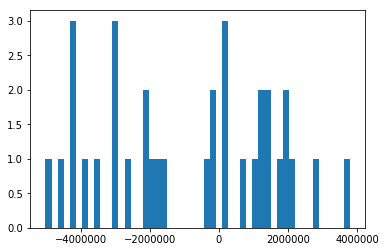

In [47]:
y_test_preds = knn_gridsearch.predict(X_test)
resids = y_test - y_test_preds
plt.hist(resids, bins=50);

rmse_knn_test = mean_squared_error(y_test, y_test_preds)
rmse_knn_train = mean_squared_error(y_test, y_test_preds)
print('rmse_knn: ', rmse_knn_test )